**Exploritory Data Analysis of Hospital Readmissions and Home Health Care***
***
This will consist of all the initial EDA and data storytelling performed when reviewing the cleaned data.

In [81]:
# Importing All the Essential Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
# Importing DataFrame for EDA
df = pd.read_csv('readmit_hhc_final.csv', index_col = 0)
df.head()

,state,hospital_count,readmission_ratio,discharges,predicted_rate,expected_rate,readmissions,excessive_count,star_rating,timeliness,...,breathing_buff,healing_buff,oral_rx_buff,hospital_admit,urgent_noadmit,pos_prof_report,pos_communicate_report,pos_treatment_ed_report,nine_to_ten_rate,would_recommend
0,AK,8,0.969563,5019.0,530.2,548.7,606.0,11,2.5,76.7,...,58.8,80.4,45.8,14.2,17.3,89,85,81,82,81
1,AL,85,1.017475,95303.0,5351.5,5308.2,15305.0,188,3.5,94.3,...,74.5,91.3,62.5,17.5,12.2,91,89,87,89,84
2,AR,45,1.032275,61703.0,2973.3,2879.7,9965.0,127,3.0,94.3,...,71.7,91.8,61.1,17.4,13.4,90,87,86,87,83
3,AZ,63,0.988116,76353.0,3930.2,3990.3,10290.0,104,3.5,93.4,...,71.3,85.8,55.2,14.9,13.5,87,84,80,81,75
4,CA,297,1.000689,303151.0,19823.2,19733.7,49252.0,580,3.5,90.3,...,71.9,91.9,55.5,14.8,11.9,85,83,82,80,74


First, let's take a look at the basics.  What is the break down of our Star Ratings and Readmission Ratios?<br>
Before we begin, let's calculate the number of bins we need for our histograms.

In [83]:
# Getting Bin Count
n_data = len(df.state)
n_bins= np.sqrt(n_data)
n_bins= int(n_bins)
print(n_bins)

7


In [84]:
# Let's Make Plots Pretty
sns.set()

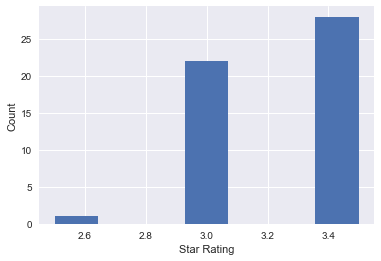

In [85]:
# Plotting Star Rating Histogram
_ = plt.hist(df.star_rating, bins =n_bins)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Count')
plt.show()

It does not appear as though there is a lot of variablitity with state average star ratings.  Nor do the star ratings appear to be normally distributed.<br>
We may need to use other surveyed reports to determine the effect of quality on hopsital readmissions.

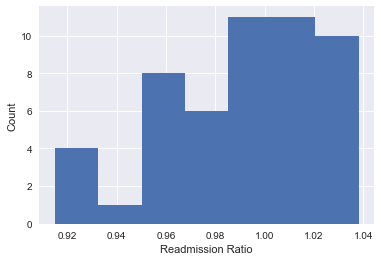

In [6]:
# Plotting Readmission Ratio Histogram
_ = plt.hist(df.readmission_ratio, bins = n_bins)
_ = plt.xlabel('Readmission Ratio')
_ = plt.ylabel('Count')
plt.show()

After reviewing the histogram of readmission ratios, there does appear to be more variability, but it does not appear to be noramlly distributed.<br>
I wonder if more observations would lead to a normal distribution. <br> 
That said, it does appear that excessive readmissions is a problem for most states.<br>
To reiterate, a readmission ratio of 1.0 or greated indicates excessive readmission<br>
Let's take a look at how the states compare with each other to help us see the variablity amongst the states.

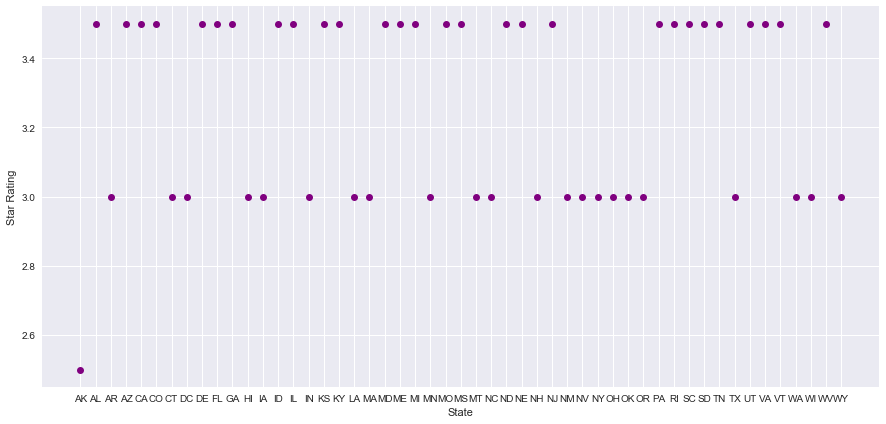

In [7]:
# Plotting Star Rating by State
plt.subplots(0,figsize=(15,7))
_ = plt.plot(df.state, df.star_rating, marker='o', linestyle='none', color = 'purple')
_ = plt.xlabel('State')
_ = plt.ylabel('Star Rating')
plt.show()

Like the histogram displayed, there is not a lot of variability in state star rating average.

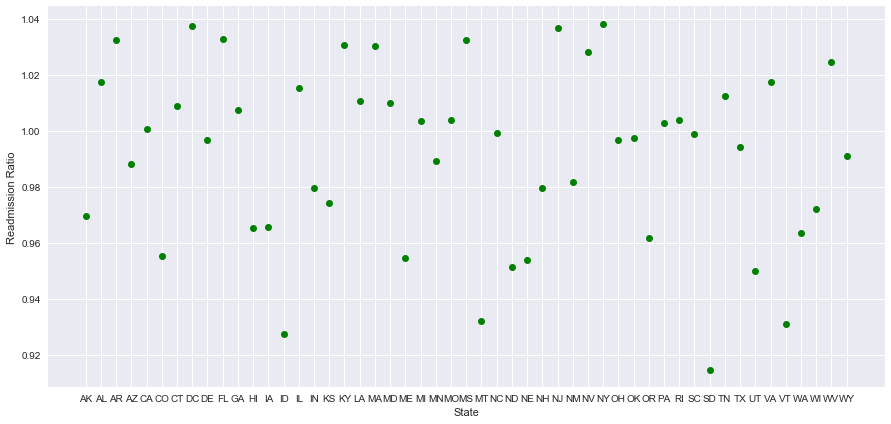

In [8]:
# Plotting Readmisison Ratios by State
plt.subplots(0,figsize=(15,7))
_ = plt.plot(df.state, df.readmission_ratio, marker='o', linestyle='none', color = 'green')
_ = plt.xlabel('State')
_ = plt.ylabel('Readmission Ratio')
plt.show()

While unclear, it appears as though there may be some relationship between star rating and the readmission ratio.<br>
I will verify this later in a scatter plot of the two variables.

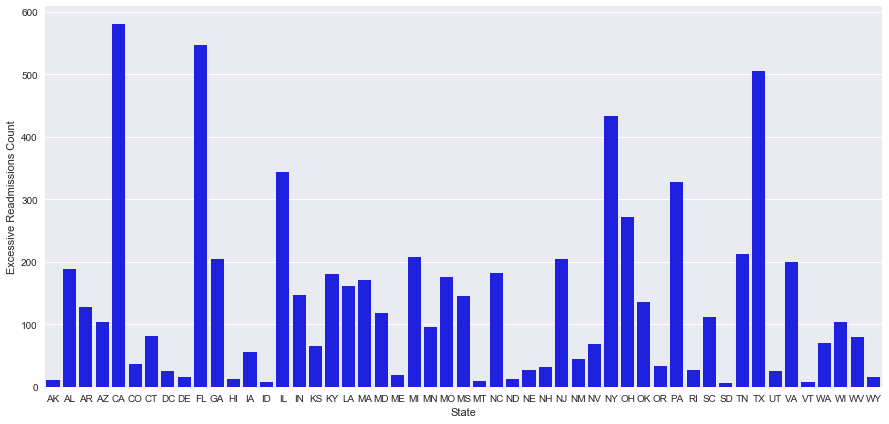

In [9]:
# Plotting Exceccivie Readmission Count by State
plt.subplots(0,figsize=(15,7))
_ = sns.barplot(x='state', y = 'excessive_count', data=df, color = 'blue')
_ = plt.xlabel('State')
_ = plt.ylabel('Excessive Readmissions Count')
plt.show()

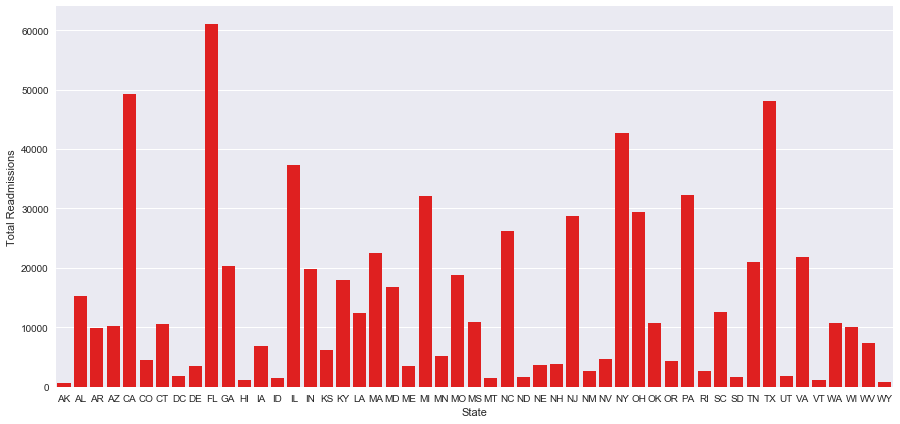

In [10]:
# Plotting Total Readmission Count by State
plt.subplots(0,figsize=(15,7))
_ = sns.barplot(x='state', y = 'readmissions', data=df, color = 'red')
_ = plt.xlabel('State')
_ = plt.ylabel('Total Readmissions')
plt.show()

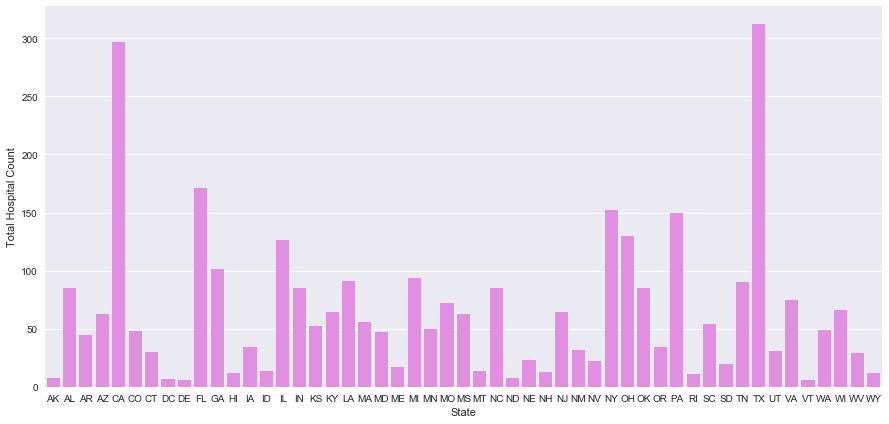

In [11]:
# Plotting Total Hospital Count by State
plt.subplots(0,figsize=(15,7))
_ = sns.barplot(x='state', y = 'hospital_count', data=df, color = 'violet')
_ = plt.xlabel('State')
_ = plt.ylabel('Total Hospital Count')
plt.show()

After reviewing these bar charts, it is not particularly clear what the differences are between states.<br>
There are some variablilites between the three, but I feel state population may be playing a large role in these counts.<br>
High population states rank high in all three bar charts.<br>
If I can get multiple obersvations per state, a bee swarm plot or a violin plot may be helpful in better displaying state variability and differences.<br>
Now that we have state comparisons charted out.  Let's dive deeper into how the different measures relate to one another.

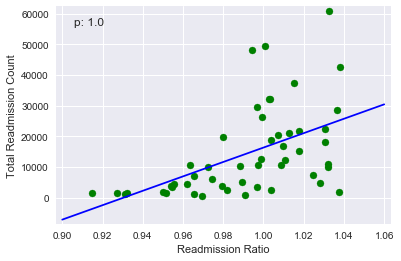

In [63]:
# Plotting Scatter Plot Excessive Readmissions Ratio with Readmissions Count
# Initializing Text Axes
f=plt.figure()
ax = f.add_subplot(111)

# Plot Data
_=plt.scatter(df.readmission_ratio, df.readmissions, color = 'green')
a,b = np.polyfit(df.readmission_ratio, df.readmissions,1)
x = np.array([0.9,1.06])
y = a*x+b
_ = plt.plot(x,y, color='blue' )
plt.margins(.02)
_ = plt.xlabel('Readmission Ratio')
_ = plt.ylabel('Total Readmission Count')

#Calculate Pearson Correlation Coeffeicient and Add it to Graph
core_mat = np.corrcoef(x,y)
pcore = core_mat[0,1]
text = 'p: %s\n'%(round(pcore,2))
_ = plt.text(0.1, 0.9,text, ha='center', va='center', transform = ax.transAxes)
    
plt.show()

As expected there appears to be a positive correlation between readmission ratios and total number of readmisisons.<br>
While sensible, it is still surprising to see a correlation coeffecient of 1.0.<br>
I'm going to be doing a lot more of these types of scatter plots.  It's best we create a function to automate this.

In [86]:
def scatterme(x,y):
    """This function will take in two dataframe columns you want to create a scatter plot for and create a scatter plot
    with a line of best fit for you to futher label and call.  The function will also compute the pearson 
    correlation coefficient and add it to the chart"""
    
    # Initializing Text Axes
    f=plt.figure()
    ax = f.add_subplot(111)
    
    # Plots Initial Scatter Plot
    _ = plt.scatter(x,y,color='green')
    
    # Finds Line of Best Fit and Overlays It
    a,b=np.polyfit(x,y,1)
    x2 = np.array([np.min(x),np.max(x)])
    y2 = a*x2+b
    _ = plt.plot(x2,y2, color = 'blue')
    plt.margins(.02)
    
    # Finds Pearson Correlation Coefficient and Adds it to Graph
    core_mat = np.corrcoef(x,y)
    pcore = core_mat[0,1]
    text = 'p: %s\n'%(round(pcore,2))
    _ = plt.text(0.1, 0.9,text, ha='center', va='center', transform = ax.transAxes)
    
    

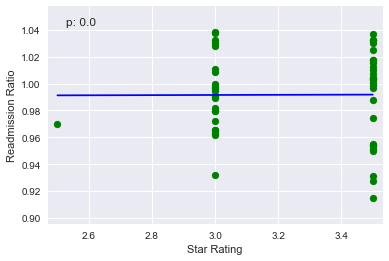

In [87]:
# Plotting Scatter Plot of Star Ratings and Readmission Ratios
_ = scatterme(df.star_rating, df.readmission_ratio)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()


With the current data, it does not look like there is any correlation between the readmission ratio and  star rating.<br>
Let's dive deeper into some of the other measures surveyed.

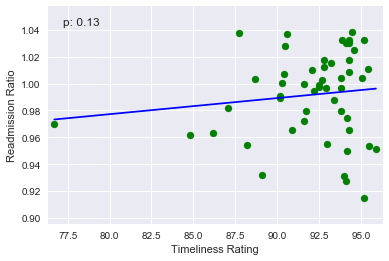

In [28]:
# Timeliness Rating and Readmission Ratio
_ = scatterme(df.timeliness, df.readmission_ratio)
_ = plt.xlabel('Timeliness Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

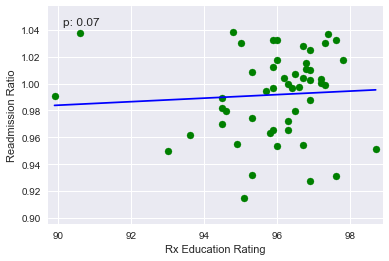

In [29]:
# RX Education and Readmission Ratio
_ = scatterme(df.rx_ed, df.readmission_ratio)
_ = plt.xlabel('Rx Education Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

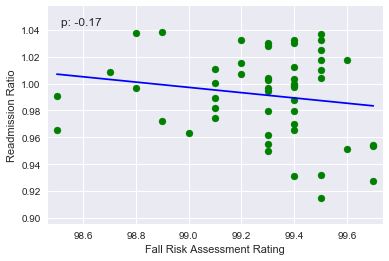

In [30]:
# Fall Risk Assessment Rating and Readmission Ratio
_ = scatterme(df.fall_risk, df.readmission_ratio)
_ = plt.xlabel('Fall Risk Assessment Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

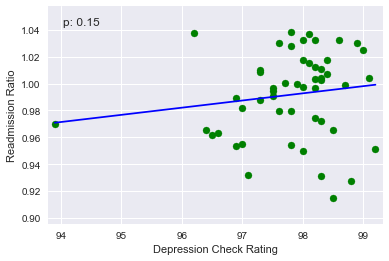

In [31]:
# Depression Check Rating and Readmission Ratio
_ = scatterme(df.depression_check, df.readmission_ratio)
_ = plt.xlabel('Depression Check Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

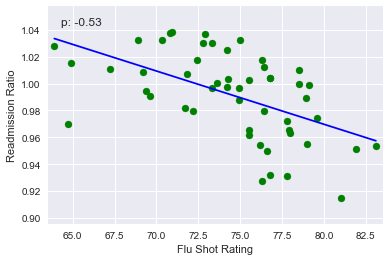

In [32]:
# Flu Shot Rating and Readmission Ratio
_ = scatterme(df.flu_shot, df.readmission_ratio)
_ = plt.xlabel('Flu Shot Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

Our first stronger negative correlation!  This is something I would expect to see, and should definitely be expanded on further.

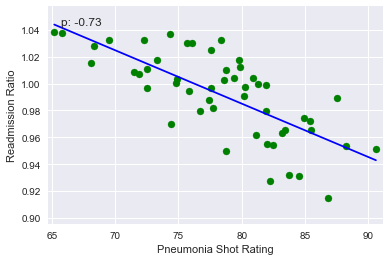

In [33]:
# Pneumonia Shot Rating and Readmission Ratio
_ = scatterme(df.pneumonia_shot, df.readmission_ratio)
_ = plt.xlabel('Pneumonia Shot Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

Another strong negative correlation!  Both shot ratings seem to correlate!  Maybe a narrative about yearly flu and pneumonia shots would be valuable!

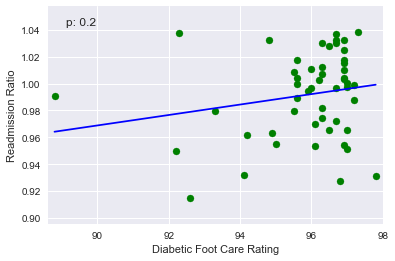

In [34]:
# Diabetic Footcare Rating and Readmission Ratio
_ = scatterme(df.d_foot_care, df.readmission_ratio)
_ = plt.xlabel('Diabetic Foot Care Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

I'm beginning to notice that larger variation in ratings might lead to stronger correlations and small variations might lead to weaker or null correlations.<br>
Let's take a step back breifly and examine the variance within the data.

In [88]:
# Dropping Non-Rated Categories and Melting them into a New Dataframe.
categories = df.drop(['state', 'hospital_count','readmission_ratio','discharges','predicted_rate','expected_rate',
                'readmissions','excessive_count', 'star_rating'], axis=1)
melted = pd.melt(categories)
melted.columns=('category','rating')

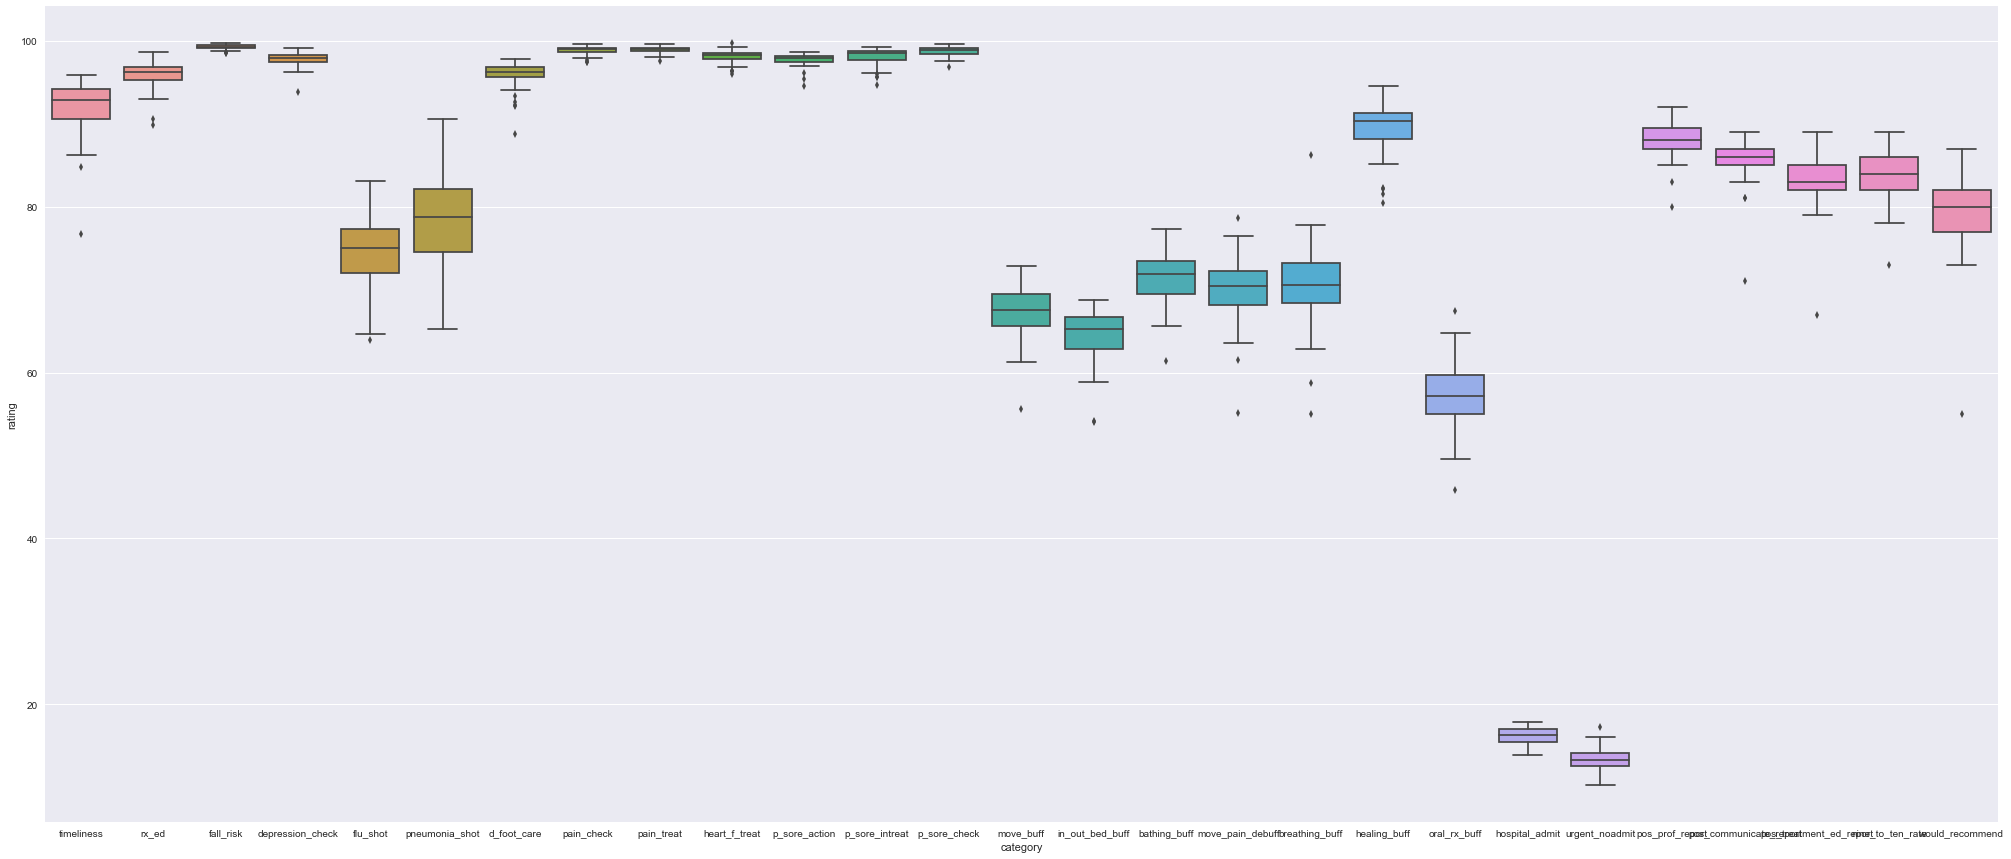

In [89]:
# Plot Box Plots for All Categories to Show Relative Variation
plt.subplots(0,figsize=(35,15))
_=sns.boxplot(x='category',y='rating',data=melted)
plt.show()

While difficult to read in it's current form, it is clear that each category can differ in variation quite substantially.<br>
The categories also appear clustered by level of variance, which might indicate category groupings.<br>
<br>
Now let's get back to mapping out the rest of this data!

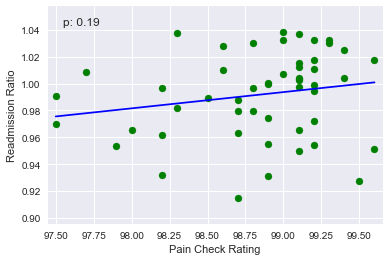

In [68]:
# Pain Check Rating and Readmission Ratio
_ = scatterme(df.pain_check, df.readmission_ratio)
_ = plt.xlabel('Pain Check Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

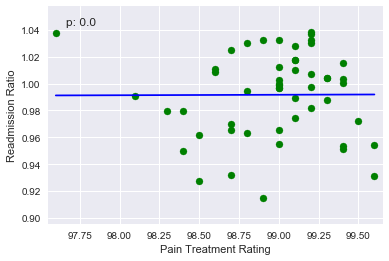

In [69]:
# Pain Treatment Rating and Readmission Ratio
_ = scatterme(df.pain_treat, df.readmission_ratio)
_ = plt.xlabel('Pain Treatment Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

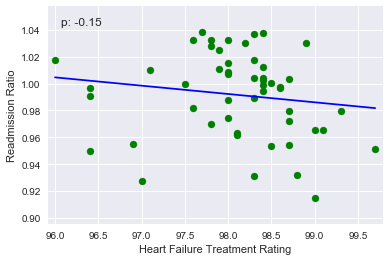

In [70]:
# Heart Failure Treatment Rating and Readmission Ratio
_ = scatterme(df.heart_f_treat, df.readmission_ratio)
_ = plt.xlabel('Heart Failure Treatment Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

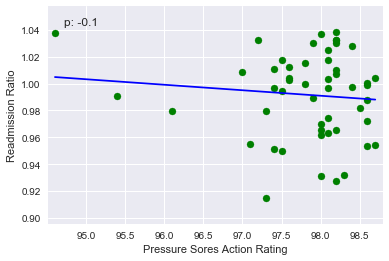

In [71]:
# Pressure Sores Action Rating and Readmission Ratio
_ = scatterme(df.p_sore_action, df.readmission_ratio)
_ = plt.xlabel('Pressure Sores Action Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

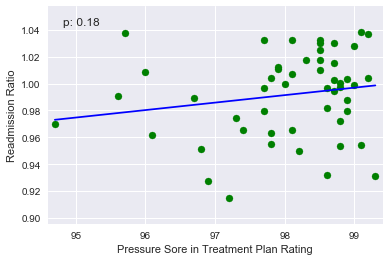

In [72]:
# Pressure Sore in Treatment Plan Rating and Readmission Ratio
_ = scatterme(df.p_sore_intreat, df.readmission_ratio)
_ = plt.xlabel('Pressure Sore in Treatment Plan Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

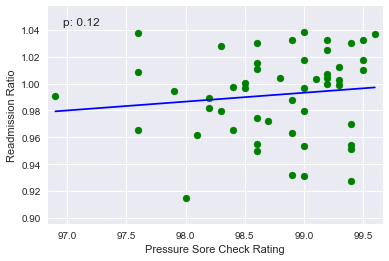

In [73]:
# Pressure Sore Check Rating and Readmission Ratio
_ = scatterme(df.p_sore_check, df.readmission_ratio)
_ = plt.xlabel('Pressure Sore Check Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

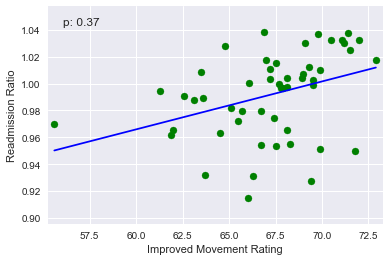

In [74]:
# Improved Movement Rating and Readmission Ratio
_ = scatterme(df.move_buff, df.readmission_ratio)
_ = plt.xlabel('Improved Movement Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

This was unexpected!  A positive correlation between improved moement and hospital readmission.

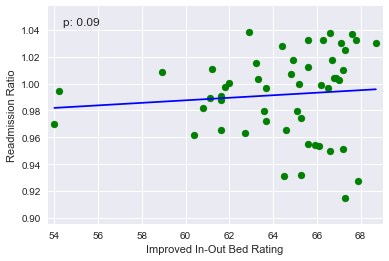

In [75]:
# Improved In-Out of Bed Rating and Readmission Ratio
_ = scatterme(df.in_out_bed_buff, df.readmission_ratio)
_ = plt.xlabel('Improved In-Out Bed Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

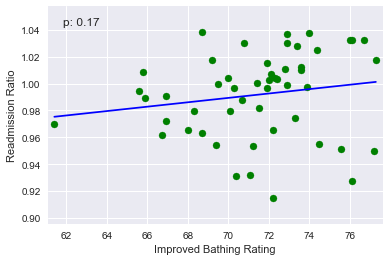

In [76]:
# Improved Bathing Rating and Readmission Ratio
_ = scatterme(df.bathing_buff, df.readmission_ratio)
_ = plt.xlabel('Improved Bathing Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

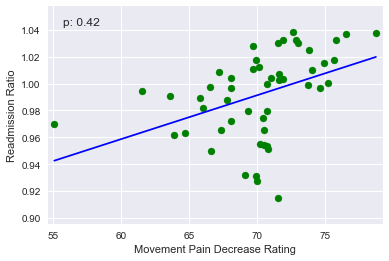

In [77]:
# Movement Pain Decrease Rating and Readmission Ratio
_ = scatterme(df.move_pain_debuff, df.readmission_ratio)
_ = plt.xlabel('Movement Pain Decrease Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

An even stronger positive correlation for decreased movement pain!  I wonder, does improved mobility increase hospital readmission?

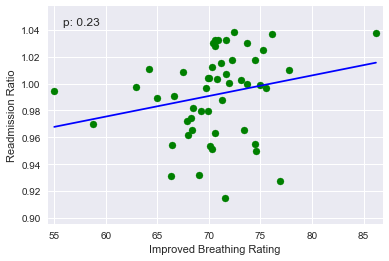

In [48]:
# Improved Breathing Rating and Readmission Ratio
_ = scatterme(df.breathing_buff, df.readmission_ratio)
_ = plt.xlabel('Improved Breathing Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

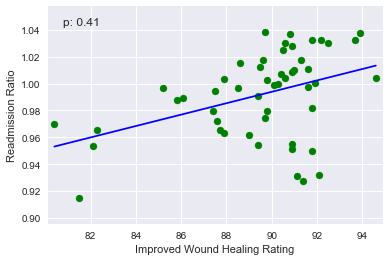

In [78]:
# Improved Wound Healing Rating and Readmission Ratio
_ = scatterme(df.healing_buff, df.readmission_ratio)
_ = plt.xlabel('Improved Wound Healing Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

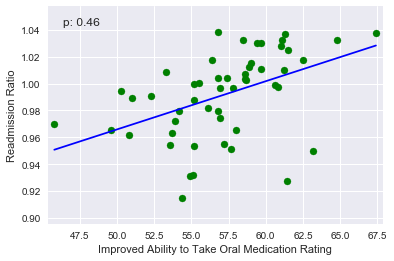

In [50]:
# Improved Ability to Take Oral Medication Rating and Readmission Ratio
_ = scatterme(df.oral_rx_buff, df.readmission_ratio)
_ = plt.xlabel('Improved Ability to Take Oral Medication Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

Three more positive correlations relating to increased mobility and independence!  These finding are definitely worth a deeper dive.

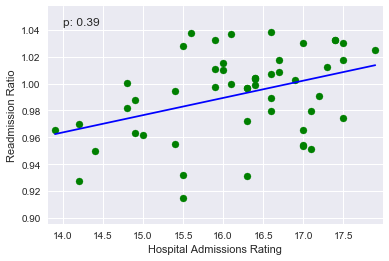

In [79]:
# Hospital Admissions Rating and Readmission Ratio
_ = scatterme(df.hospital_admit, df.readmission_ratio)
_ = plt.xlabel('Hospital Admissions Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

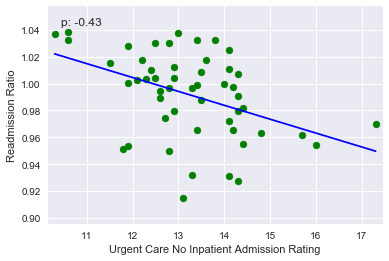

In [52]:
# Urgent Care No Inpatient Admission Rating and Readmission Ratio
_ = scatterme(df.urgent_noadmit, df.readmission_ratio)
_ = plt.xlabel('Urgent Care No Inpatient Admission Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

A stronger negative correlation.  This one is expected as urgent care can be another way to receive care without hospitalization.

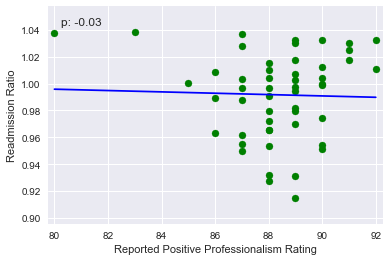

In [53]:
# Reported Positive Professionalism Rating and Readmission Ratio
_ = scatterme(df.pos_prof_report, df.readmission_ratio)
_ = plt.xlabel('Reported Positive Professionalism Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

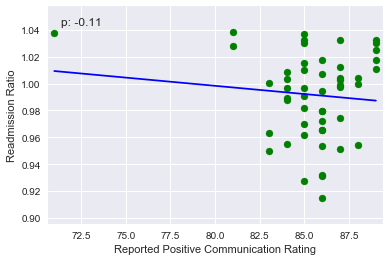

In [54]:
# Reported Positive Communication Rating and Readmission Ratio
_ = scatterme(df.pos_communicate_report, df.readmission_ratio)
_ = plt.xlabel('Reported Positive Communication Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

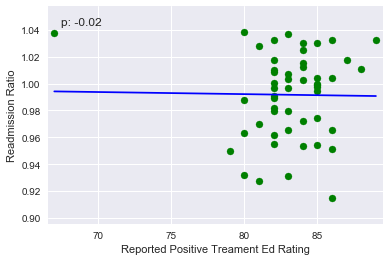

In [55]:
# Reported Positive Treatment Ed Rating and Readmission Ratio
_ = scatterme(df.pos_treatment_ed_report, df.readmission_ratio)
_ = plt.xlabel('Reported Positive Treament Ed Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

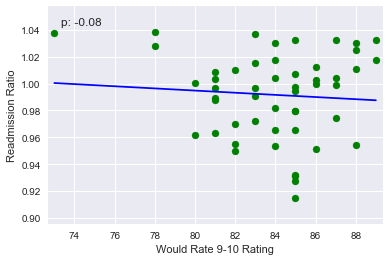

In [56]:
# Would Rate 9-10 Rating and Readmission Ratio
_ = scatterme(df.nine_to_ten_rate, df.readmission_ratio)
_ = plt.xlabel('Would Rate 9-10 Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

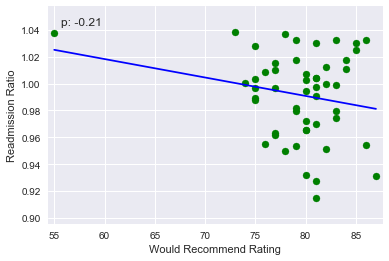

In [57]:
# Would Recommend Rating and Readmission Ratio
_ = scatterme(df.would_recommend, df.readmission_ratio)
_ = plt.xlabel('Would Recommend Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

It appears that many of the categories behave in both expected and unexpected ways.<br>
Taking the data at face value, it appears that flu and pneumonia shots may decrease the amount of hospital readmissions.<br>
Furthermore, a positive patient outlook towards the home-health-care porivder appears to have little correlation to decreased  hospital readmissions.<br>
Unexpectedly, it appears as though increases in movement and independence, as well as decreases in movement pain may lead to an increase in hospital readmission.


Ultimately, this EDA has lead me to conclude that more observations may be needed.<br>
As such, I will return to the data and clean it in order to keep all of the observations for hospitals within all of the states. <br>
I will also clean up the data ratings for individual home health care agencies.

This new cleaned data will be stored in two separate dataframes, and a new EDA will be done in order to see if my conclusion that more data is needed is correct.<br>
I am fascinated to find out if the stronger correlations hold up with more data as well.